In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In the data wrangling stage of this project I had saved multiple versions of the dataset. I've chosen the dataset with the most records and missing values as N/A so I can get as much information as possible without possible skewed results from adding a new category for missing values in categorical variables.

In [2]:
df = pd.read_csv('../raw_data/dataset_missing_as_nan.csv', na_values=['?'], index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 855 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 855 non-null    int64  
 1   Number of sexual partners           829 non-null    float64
 2   First sexual intercourse            848 non-null    float64
 3   Num of pregnancies                  799 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-null  

Let's see if there are any interesting relationships between our targets (test results) and numerical variables.

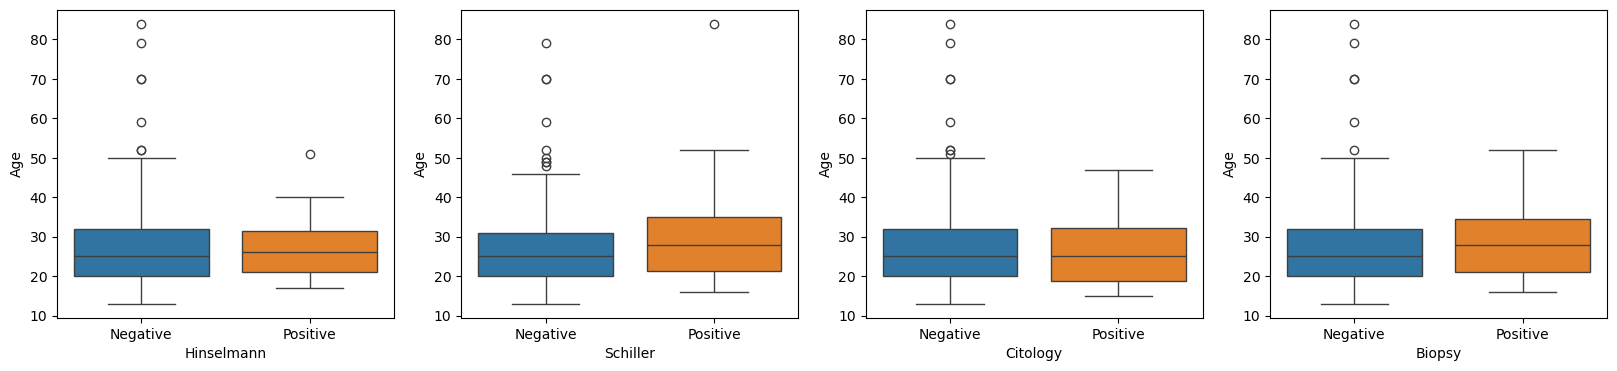

In [129]:
test_types = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']

fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for index, test in enumerate(test_types):
    sns.boxplot(x=df[test], y=df['Age'], ax=ax[index], hue=df[test])
    ax[index].set_xticks([0, 1])
    ax[index].set_xticklabels(['Negative', 'Positive'])
    ax[index].legend([],[], frameon=False)

Only the Schiller and biopsy tests showed a notably different median age of patients with positive test results compared to those with negative test results.

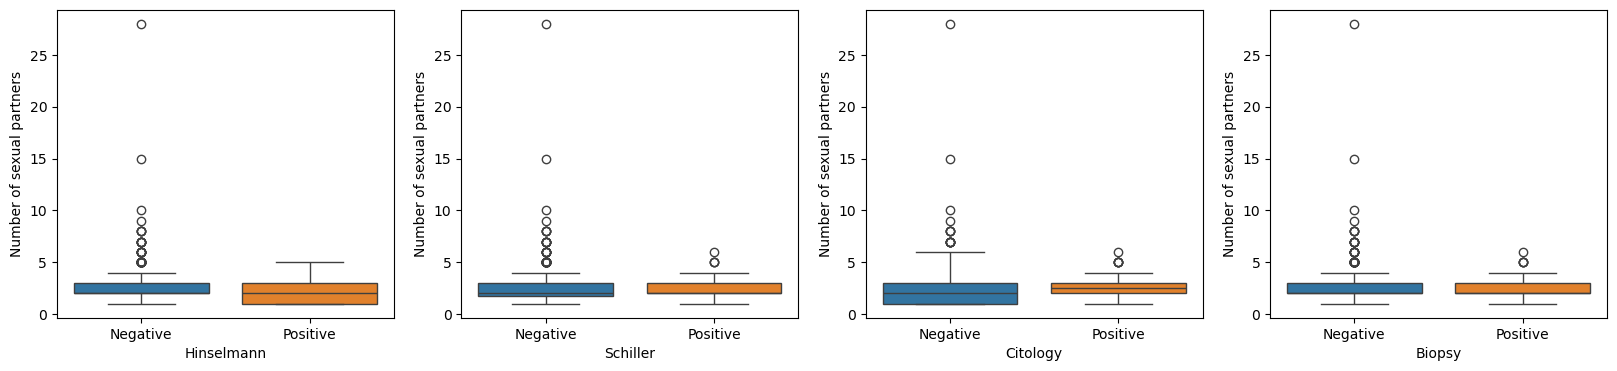

In [21]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for index, test in enumerate(test_types):
    sns.boxplot(x=df[test], y=df['Number of sexual partners'], ax=ax[index], hue=df[test])
    ax[index].set_xticks([0, 1])
    ax[index].set_xticklabels(['Negative', 'Positive'])
    ax[index].legend([],[], frameon=False)

The Hinselmann and citology tests showed differences in IQR of number of sexual partners of patients. Hinselmann test shows an IQR with lower numbers for patients with positive tests and citology shows a similar IQR drop but in patients with negative test results.

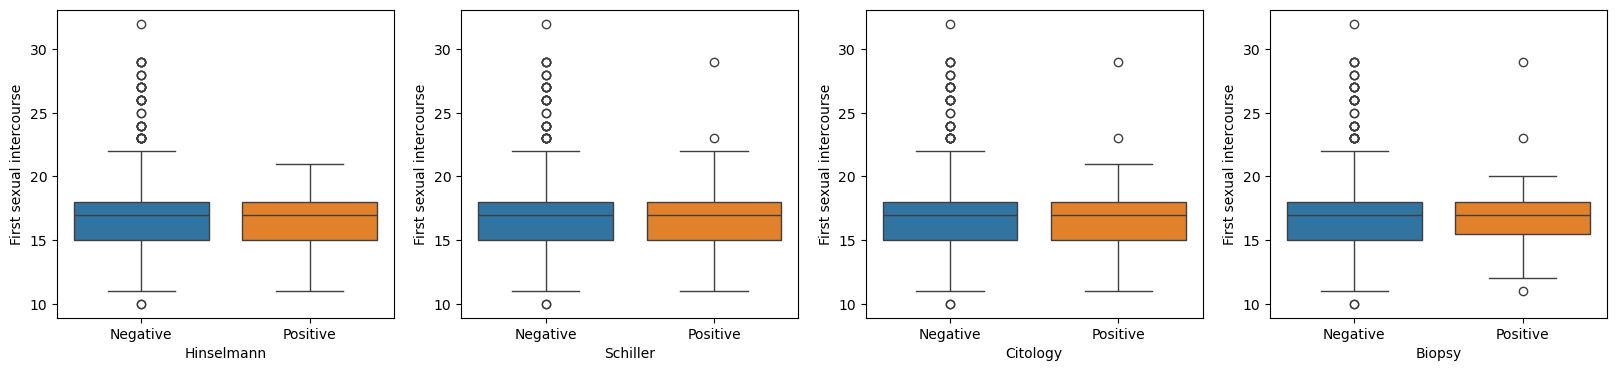

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for index, test in enumerate(test_types):
    sns.boxplot(x=df[test], y=df['First sexual intercourse'], ax=ax[index], hue=df[test])
    ax[index].set_xticks([0, 1])
    ax[index].set_xticklabels(['Negative', 'Positive'])
    ax[index].legend([],[], frameon=False)

The age at which patients first had sexual intercourse does not seem to make any difference in test results.

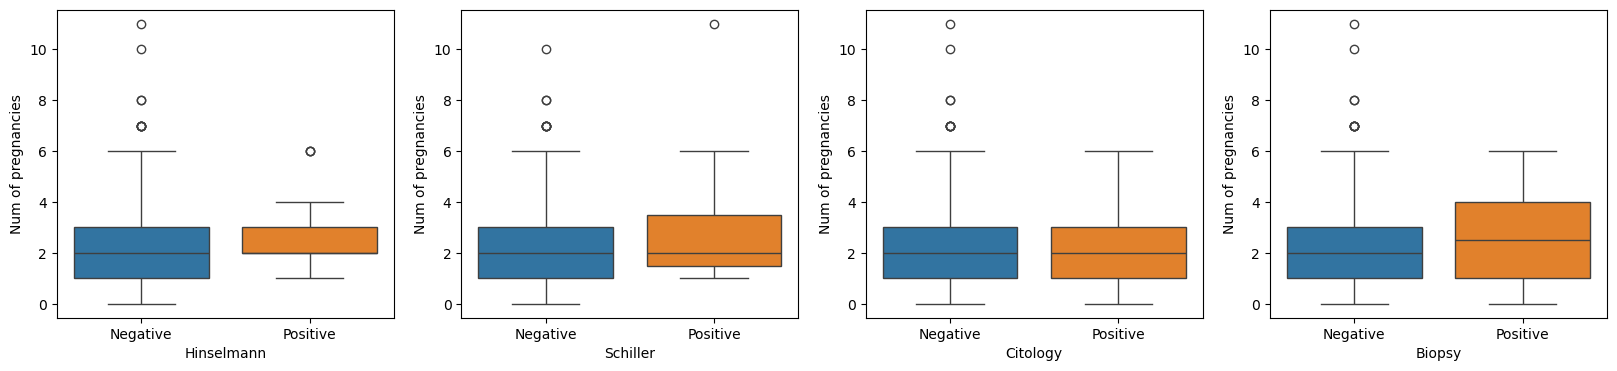

In [23]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for index, test in enumerate(test_types):
    sns.boxplot(x=df[test], y=df['Num of pregnancies'], ax=ax[index], hue=df[test])
    ax[index].set_xticks([0, 1])
    ax[index].set_xticklabels(['Negative', 'Positive'])
    ax[index].legend([],[], frameon=False)

The median number of pregnancies in patients whose biopsy tests returned positive is greater than those whose biopsy tests were negative.

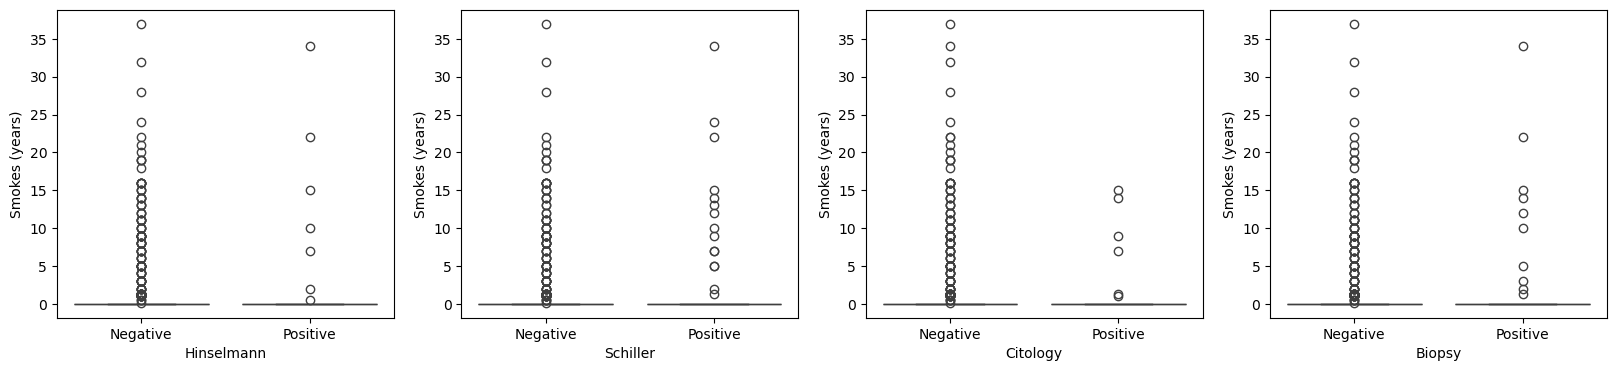

In [24]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for index, test in enumerate(test_types):
    sns.boxplot(x=df[test], y=df['Smokes (years)'], ax=ax[index], hue=df[test])
    ax[index].set_xticks([0, 1])
    ax[index].set_xticklabels(['Negative', 'Positive'])
    ax[index].legend([],[], frameon=False)

The charts depicting the distributions of how long patients have smoked do not seem to show anything notable other than the fact that most of the patients have smoked for 0 years, or not at all. There are not many differences in outliers between all of the groups shown above.

In [25]:
df['Smokes'].value_counts()

Smokes
0.0    722
1.0    123
Name: count, dtype: int64

Most of the patients reported having not smoked before, so it makes sense that the 0 years these patients have smoked are greatly impacting the boxplots. Let's see what the plots look like withouth the non-smokers skewing them.

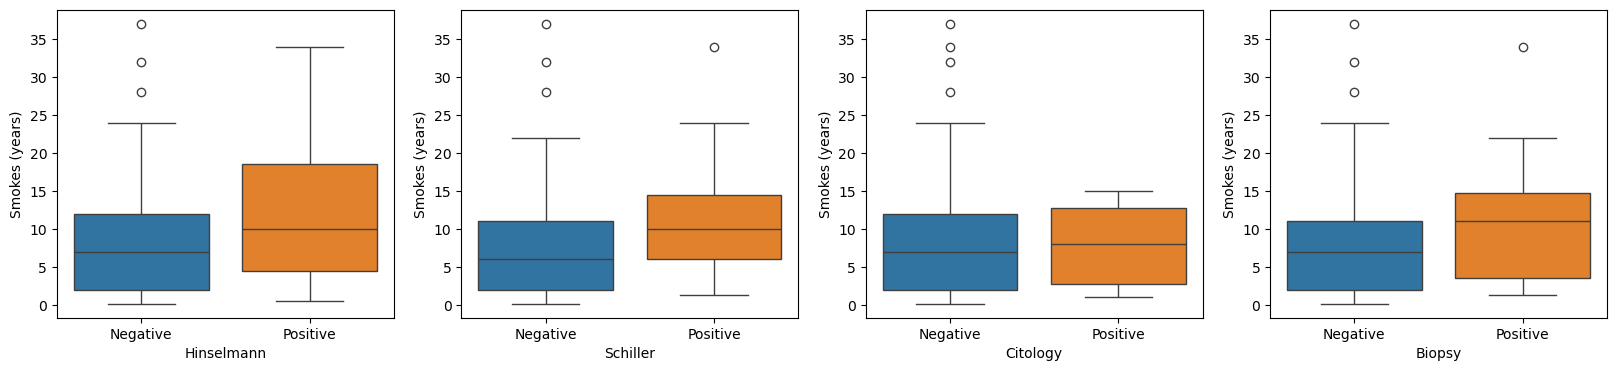

In [26]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for index, test in enumerate(test_types):
    sns.boxplot(x=df[test], y=df[df['Smokes (years)'] != 0]['Smokes (years)'], ax=ax[index], hue=df[test])
    ax[index].set_xticks([0, 1])
    ax[index].set_xticklabels(['Negative', 'Positive'])
    ax[index].legend([],[], frameon=False)

Removing all of the zeroes makes the charts for years smoking a lot more meaningful. Now we can see that out of everyone who smokes, people who have smoked for longer generally get higher rates of positive test results.

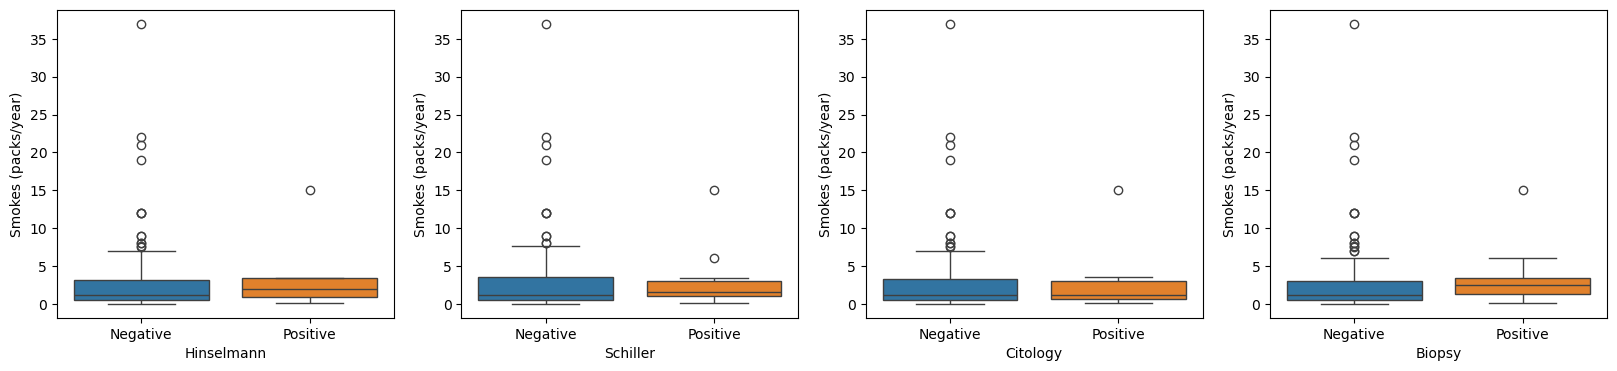

In [27]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for index, test in enumerate(test_types):
    sns.boxplot(x=df[test], y=df[df['Smokes (packs/year)'] != 0]['Smokes (packs/year)'], ax=ax[index], hue=df[test])
    ax[index].set_xticks([0, 1])
    ax[index].set_xticklabels(['Negative', 'Positive'])
    ax[index].legend([],[], frameon=False)

Applying the same change of only showing packs smoked per year in people who actually smoke, we can see that only the Hinselmann and biopsy tests show that more people who smoke more packs a year get positive results.

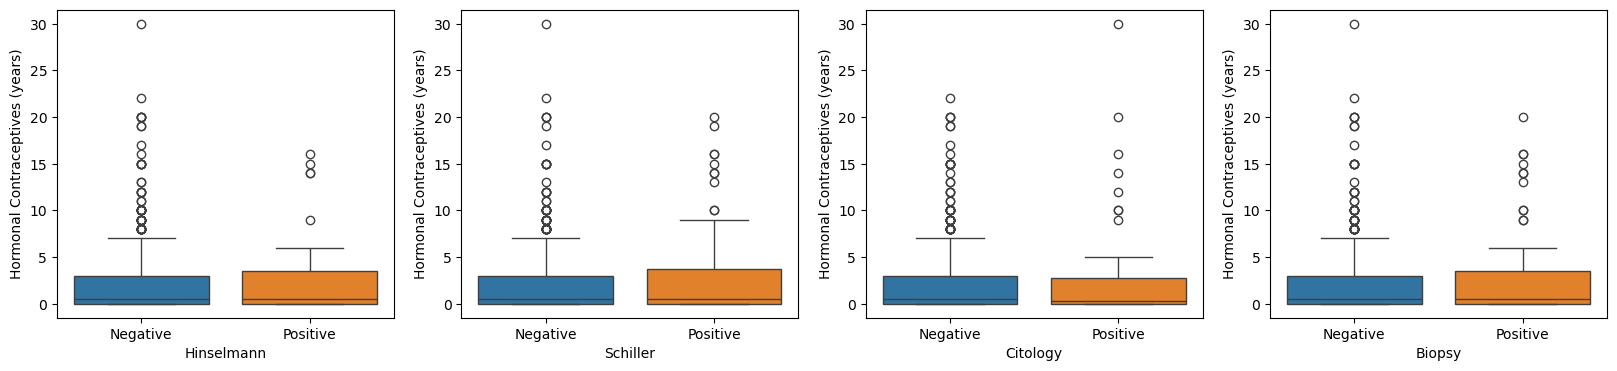

In [28]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for index, test in enumerate(test_types):
    sns.boxplot(x=df[test], y=df['Hormonal Contraceptives (years)'], ax=ax[index], hue=df[test])
    ax[index].set_xticks([0, 1])
    ax[index].set_xticklabels(['Negative', 'Positive'])
    ax[index].legend([],[], frameon=False)

The length of time during which patients have used hormonal contraceptives does not seem to have much of an impact in test results in any of the tests used.

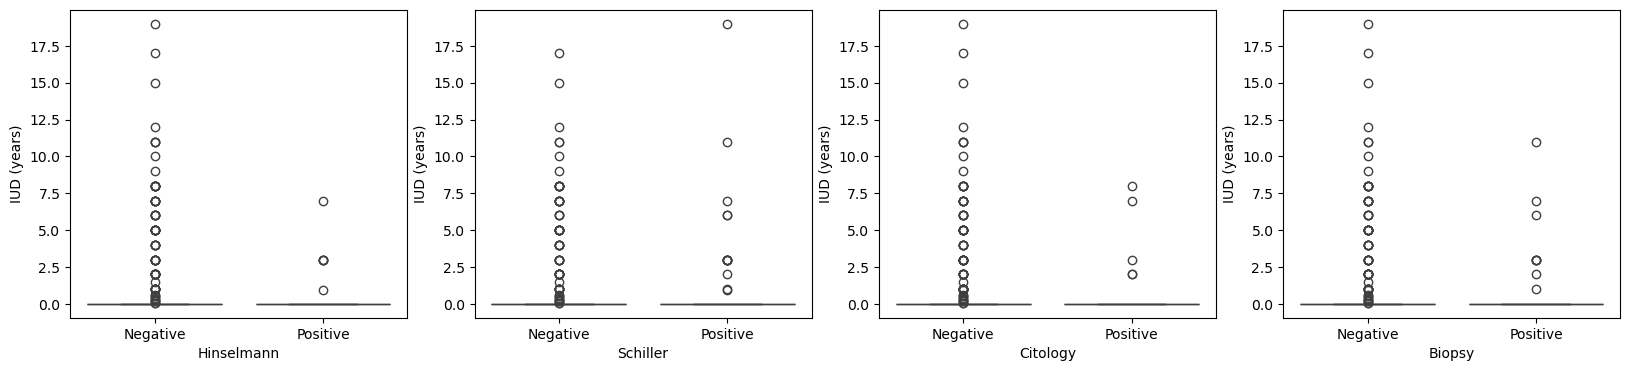

In [29]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for index, test in enumerate(test_types):
    sns.boxplot(x=df[test], y=df['IUD (years)'], ax=ax[index], hue=df[test])
    ax[index].set_xticks([0, 1])
    ax[index].set_xticklabels(['Negative', 'Positive'])
    ax[index].legend([],[], frameon=False)

In [ ]:
df['IUD'].value_counts()

IUD
0.0    658
1.0     83
Name: count, dtype: int64

Just like with smoking, most of the patients don't have an IUD.

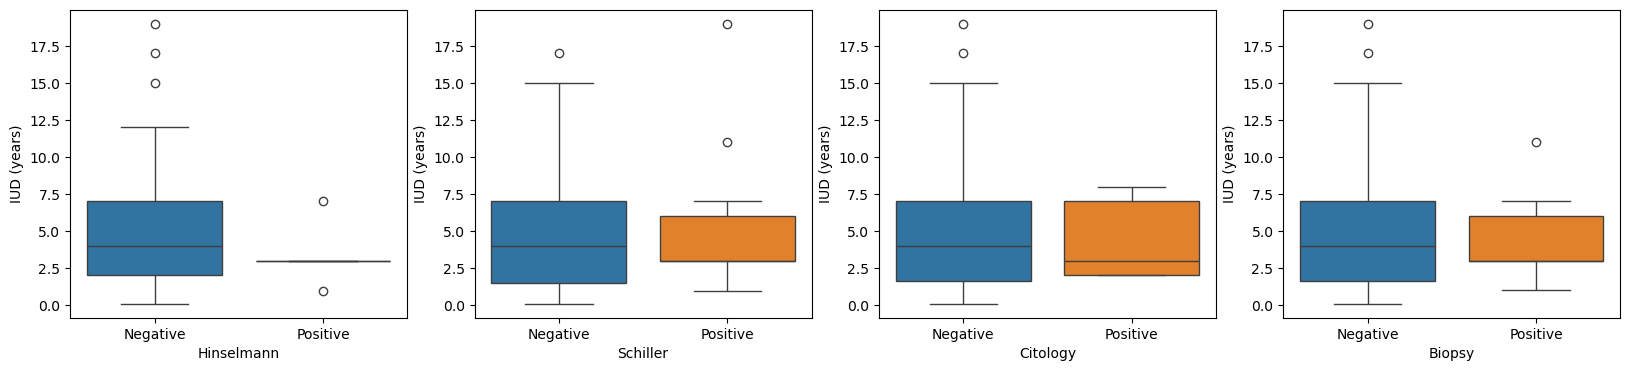

In [30]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for index, test in enumerate(test_types):
    sns.boxplot(x=df[test], y=df[df['IUD (years)'] != 0]['IUD (years)'], ax=ax[index], hue=df[test])
    ax[index].set_xticks([0, 1])
    ax[index].set_xticklabels(['Negative', 'Positive'])
    ax[index].legend([],[], frameon=False)

While the IQR of years patients testing positive with the different test have had IUDs are all a bit different, their medians are all the same.

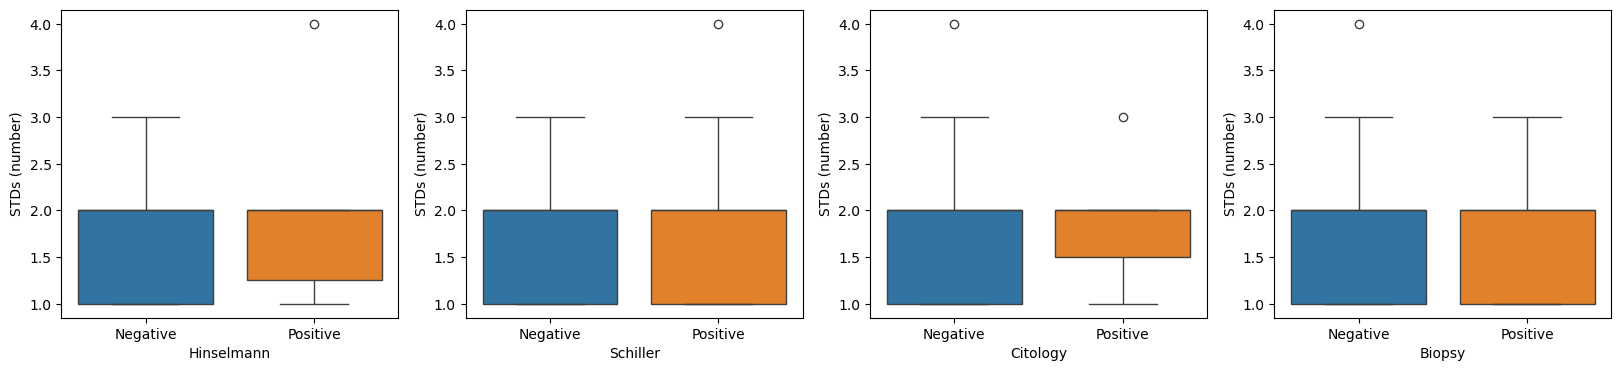

In [31]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for index, test in enumerate(test_types):
    sns.boxplot(x=df[test], y=df[df['STDs (number)'] != 0]['STDs (number)'], ax=ax[index], hue=df[test])
    ax[index].set_xticks([0, 1])
    ax[index].set_xticklabels(['Negative', 'Positive'])
    ax[index].legend([],[], frameon=False)

All of the tests show the same median and similar IQRs for number of STDs in patients (who have more than 0 STDs). Citology and Hinselmann test positive for patients with slightly higher STD numbers than the other tests.

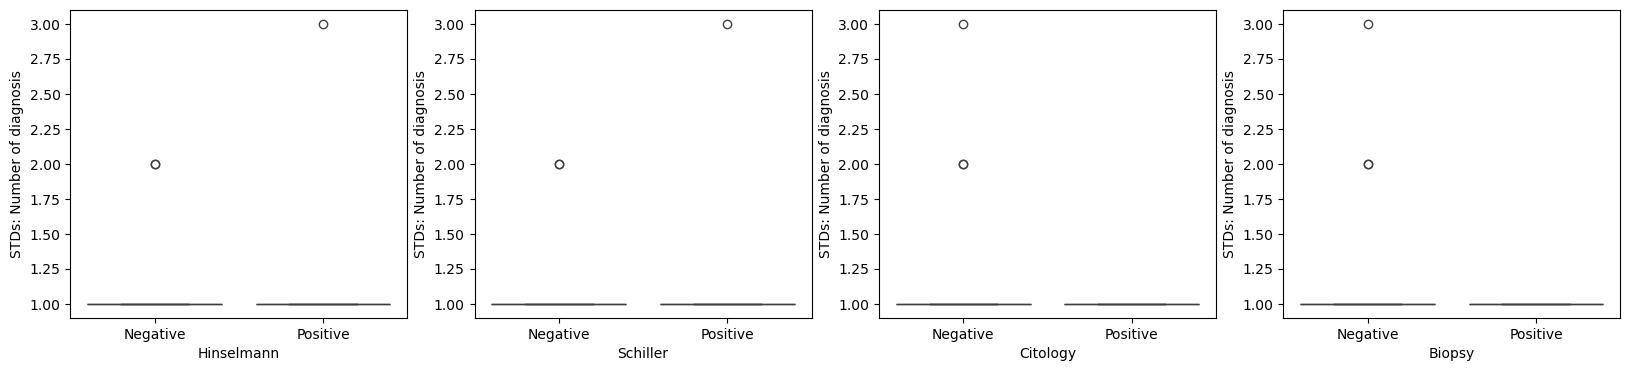

In [32]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for index, test in enumerate(test_types):
    sns.boxplot(x=df[test], y=df[df['STDs: Number of diagnosis'] != 0]['STDs: Number of diagnosis'], ax=ax[index], hue=df[test])
    ax[index].set_xticks([0, 1])
    ax[index].set_xticklabels(['Negative', 'Positive'])
    ax[index].legend([],[], frameon=False)

In [ ]:
df['STDs: Number of diagnosis'].value_counts()

STDs: Number of diagnosis
0    784
1     68
2      2
3      1
Name: count, dtype: int64

Number of STD diagnoses does not give us much useful information as a great majority of the patients reported 0 diagnoses and even if you filter those out, all but 3 of the remaining only had 1. This means the medians (and entire IQR) of all groups are 0.

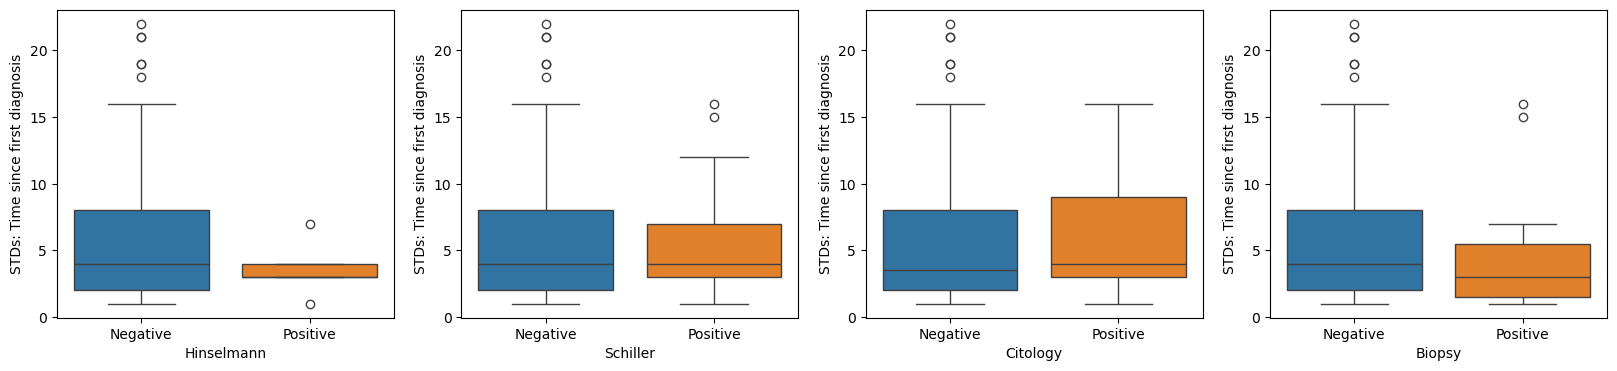

In [33]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for index, test in enumerate(test_types):
    sns.boxplot(x=df[test], y=df['STDs: Time since first diagnosis'], ax=ax[index], hue=df[test])
    ax[index].set_xticks([0, 1])
    ax[index].set_xticklabels(['Negative', 'Positive'])
    ax[index].legend([],[], frameon=False)

The median time since first STD diagnosis is a bit lower in patients who tested positive on the biopsy tests than patients who tested negative.

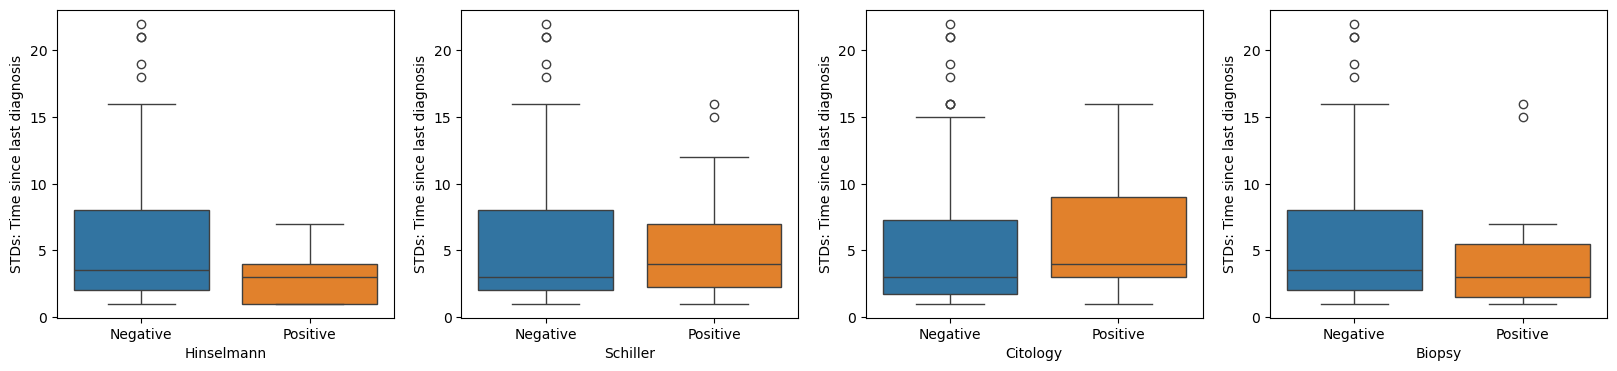

In [34]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for index, test in enumerate(test_types):
    sns.boxplot(x=df[test], y=df['STDs: Time since last diagnosis'], ax=ax[index], hue=df[test])
    ax[index].set_xticks([0, 1])
    ax[index].set_xticklabels(['Negative', 'Positive'])
    ax[index].legend([],[], frameon=False)

The median time since last STD diagnosis is higher in patients who tested positive in Schiller test and patients who tested positive in citology tests.

The numerical columns that seemed to have the greatest impact on positive test results were age, number of pregnancies, smokes (years), and IUD (years)

Let's see if we can find any categorical columns of interest.

In [104]:
def plot_heatmap(data, index, column, ax):
    sns.heatmap(pd.crosstab(data[index].fillna(2).map({0: 'No', 1: 'Yes', 2: 'Missing'}), df[column], normalize='index'), annot=True, fmt='.2f', ax=ax)
    ax.set_yticks(np.arange(len(df[index].fillna(2).value_counts())) + 0.5)
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(['Negative', 'Positive'])

Smokes
0.0        722
1.0        123
Missing     10
Name: count, dtype: int64


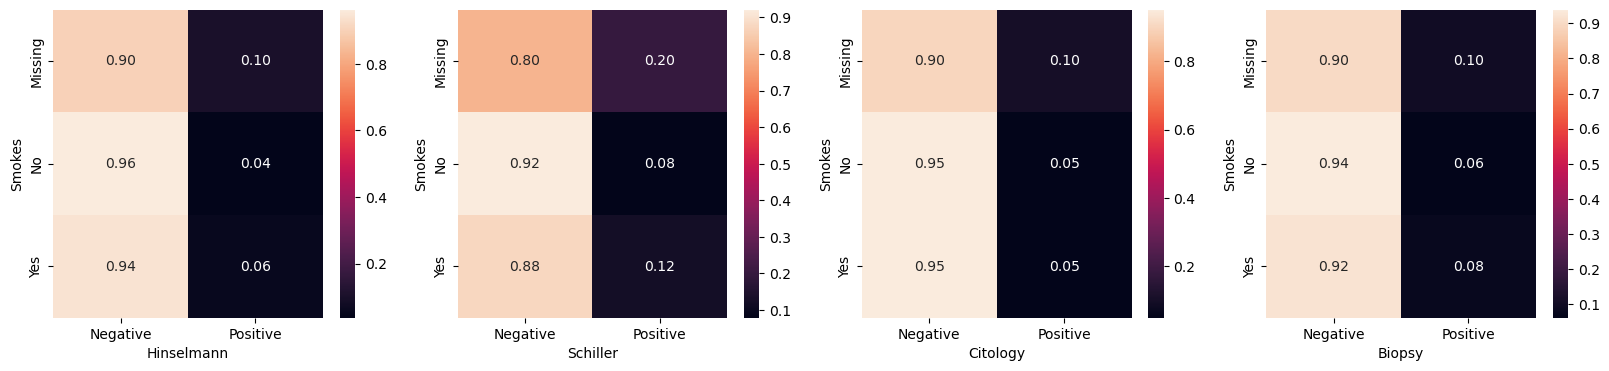

In [109]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['Smokes'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'Smokes', test, ax[index])

The patients who answered that they did smoke got a higher rate of positive results than those who don't smoke on nearly every test. There's a substantial increase in the rate of positive tests in patients who didn't answer the question, but there were only 10 in this group so it's hard to conclude if this is just a coincidence.

Hormonal Contraceptives
1.0        481
0.0        269
Missing    105
Name: count, dtype: int64


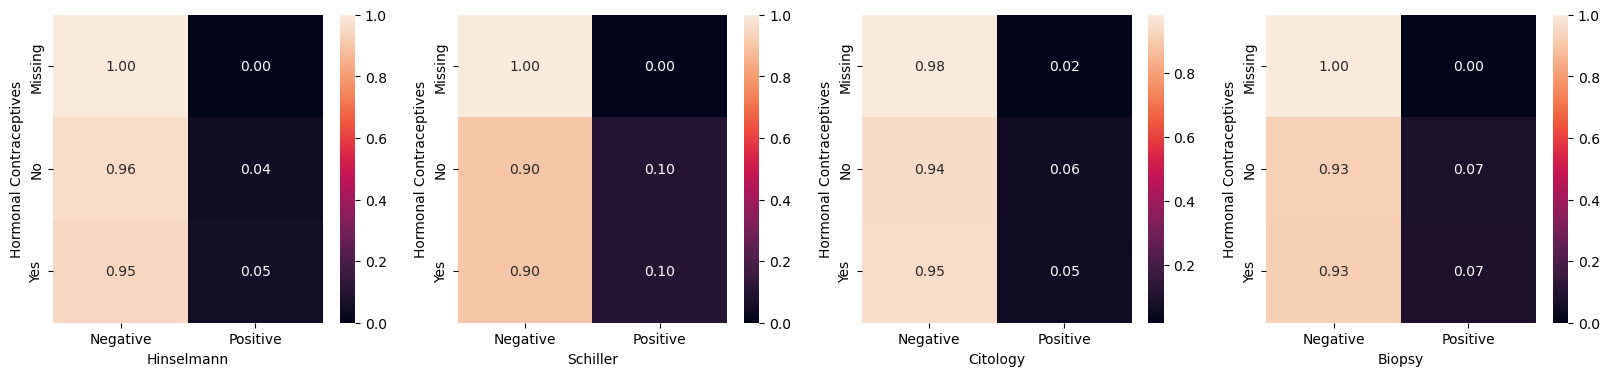

In [108]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['Hormonal Contraceptives'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'Hormonal Contraceptives', test, ax[index])

The results in tests are mostly the same in women who use hormonal contraceptives. Interestingly, almost all of the women who didn't answer on hormonal contraceptives got negative results from every single test, except for citology which got a 2% positive test rate. The 'Missing' group also accounts for around 1/8 of all of the patients, so it's not a small group either.

IUD
0.0        658
Missing    114
1.0         83
Name: count, dtype: int64


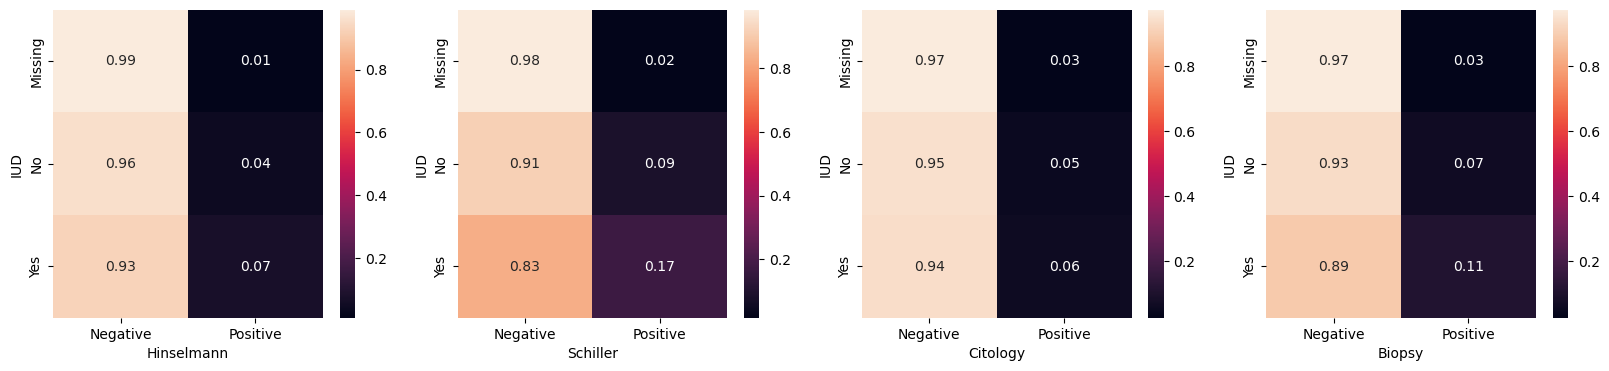

In [110]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['IUD'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'IUD', test, ax[index])

Almost every test has noticably higher rates of positive results in women with IUDs over both women who answered no and women who didn't answer at all.

STDs
0.0        674
Missing    102
1.0         79
Name: count, dtype: int64


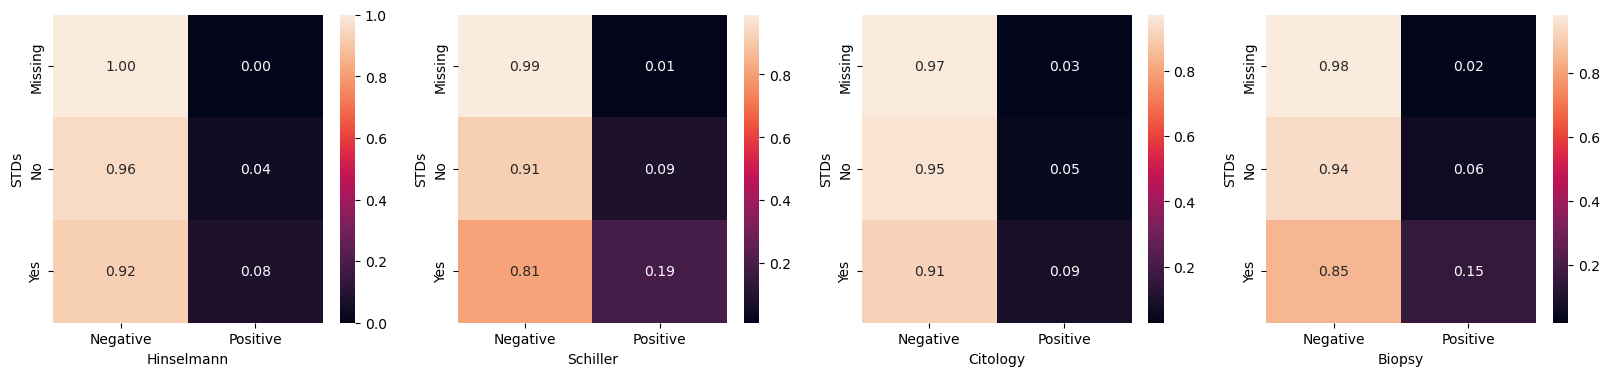

In [111]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['STDs'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'STDs', test, ax[index])

The tests all show between 4-10% increase in positive test rates in women who have STDs compared to women who don't. The women who didn't answer this question tested mostly negative, with only up to 4% positive tests on citology.

STDs:condylomatosis
0.0        709
Missing    102
1.0         44
Name: count, dtype: int64


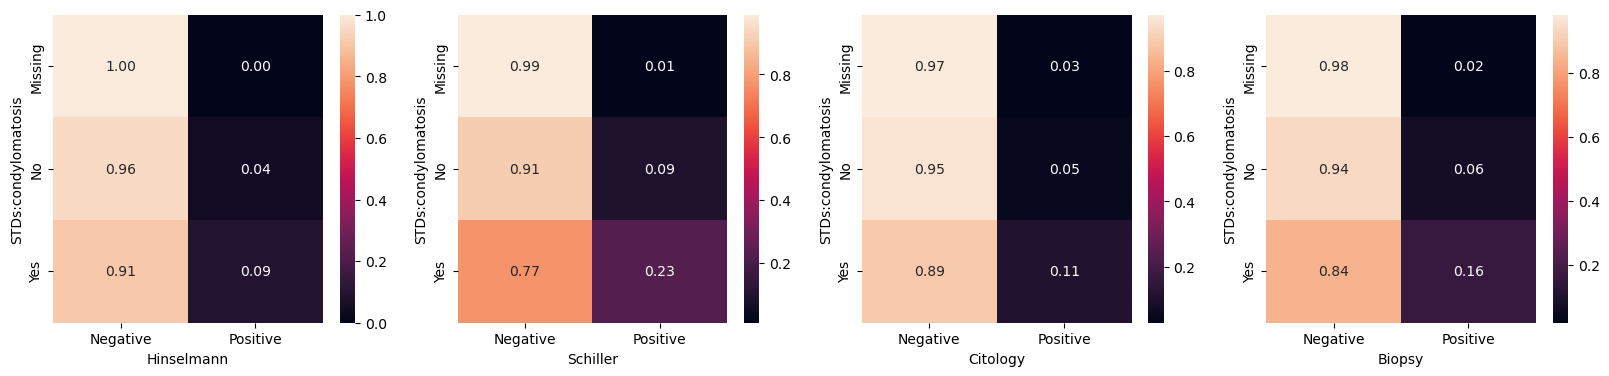

In [112]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['STDs:condylomatosis'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'STDs:condylomatosis', test, ax[index])

The patients who have condylomatosis tested positive far more often than those who didn't, with as low of a difference as 5% on the Hinselmann test and as high as 14% on the Schiller test. The 'Missing' group has remained the same and will likely continue to remain the same throughout all of the 'STDs' columns as it was largely the same group of women who didn't answer all of those related questions. Given these results, it seems likely many don't have any and just decided to skip the whole section.

STDs:cervical condylomatosis
0.0        753
Missing    102
Name: count, dtype: int64


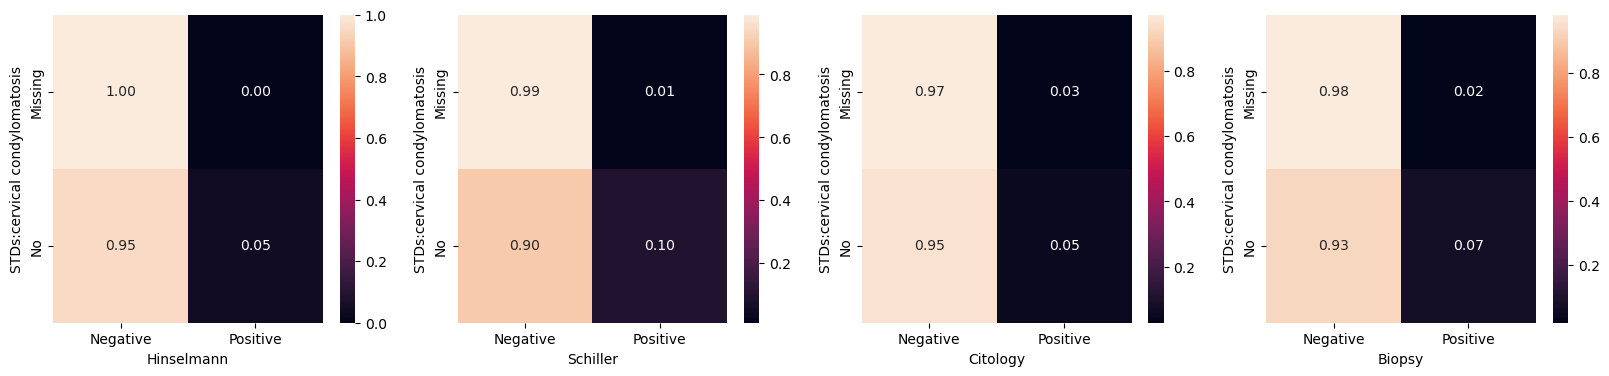

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['STDs:cervical condylomatosis'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'STDs:cervical condylomatosis', test, ax[index])

None of the patients answered yes to cervical condylomatosis. There will probably be a few variables just like this where our only differences are the 'Missing' group vs the 'No' group.

STDs:vaginal condylomatosis
0.0        749
Missing    102
1.0          4
Name: count, dtype: int64


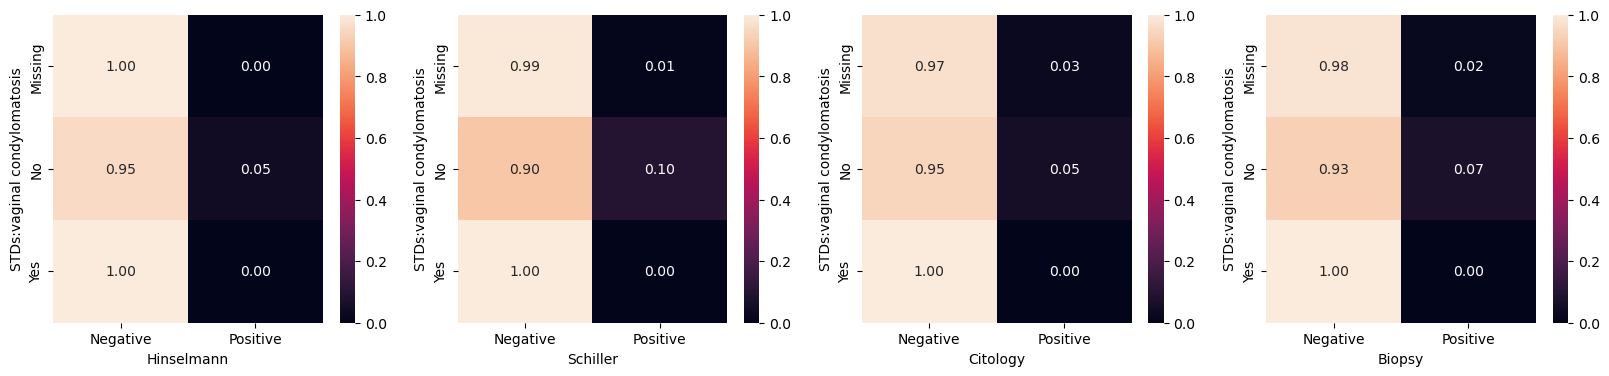

In [114]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['STDs:vaginal condylomatosis'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'STDs:vaginal condylomatosis', test, ax[index])

Only 4 women said they have vaginal condylomatosis and of those 4, none tested positive using any of the tests. The 'No' and 'Missing' groups are very much the same as they were for the last heatmap.

STDs:vulvo-perineal condylomatosis
0.0        710
Missing    102
1.0         43
Name: count, dtype: int64


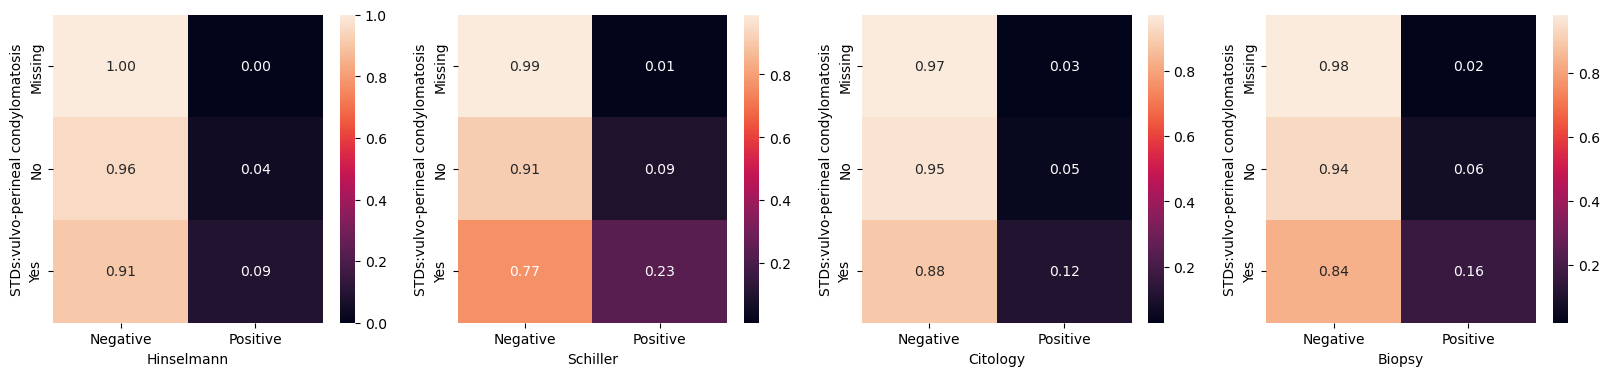

In [115]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['STDs:vulvo-perineal condylomatosis'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'STDs:vulvo-perineal condylomatosis', test, ax[index])

The women with vulvo-perineal condylomatosis have much higher rates of positive tests, the lowest difference being from the Hinselmann test with 5% greater positive proportion and the largest beign the Schiller test with 14% greater positive proportion.

STDs:syphilis
0.0        735
Missing    102
1.0         18
Name: count, dtype: int64


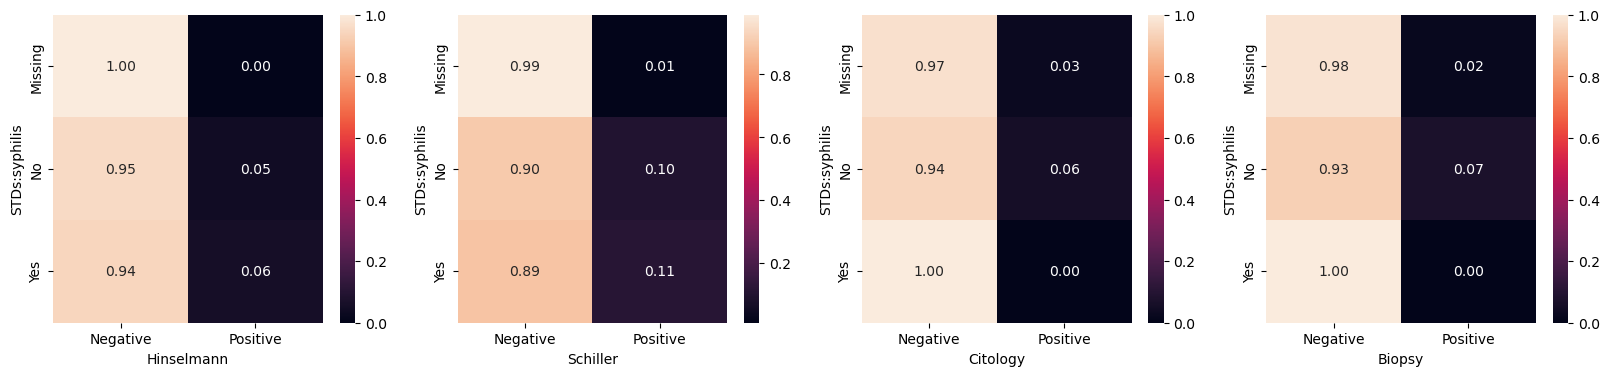

In [116]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['STDs:syphilis'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'STDs:syphilis', test, ax[index])

The patients who had syphilis tested very slightly more positive than the women without syphilis on Hinselmann and Schiller tests, but got 0 positive on citology and biopsy tests. There were only 18 women who said they did have syphilis, so this could be coincidental.

STDs:pelvic inflammatory disease
0.0        752
Missing    102
1.0          1
Name: count, dtype: int64


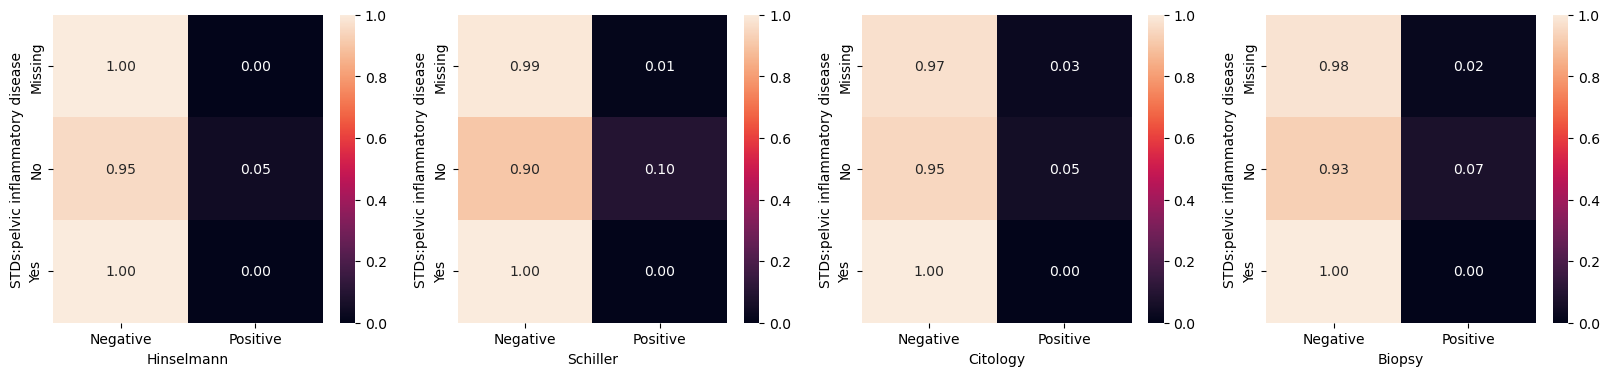

In [117]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['STDs:pelvic inflammatory disease'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'STDs:pelvic inflammatory disease', test, ax[index])

Only one woman answered yes for pelvic inflammatory disease so our 'Yes' column is more or less useless for these heatmaps, and the 'Missing' is the same as it's been for all of the previous STDs columns.

STDs:genital herpes
0.0        752
Missing    102
1.0          1
Name: count, dtype: int64


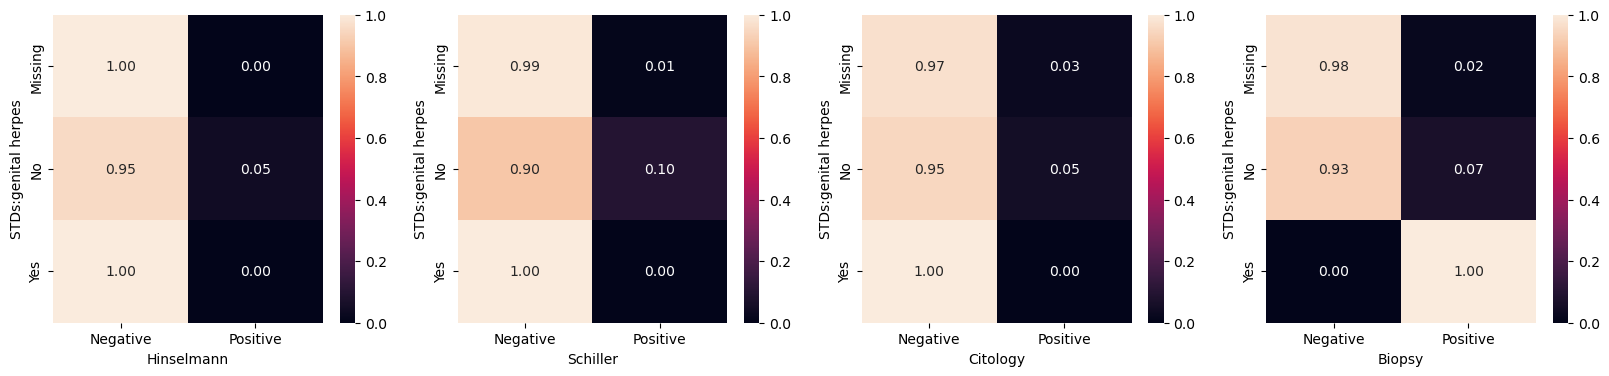

In [118]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['STDs:genital herpes'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'STDs:genital herpes', test, ax[index])

Only one woman answered yes for genital herpes as well, so these charts are essentially the same as the last, even with her positive result from the biopsy test

STDs:molluscum contagiosum
0.0        752
Missing    102
1.0          1
Name: count, dtype: int64


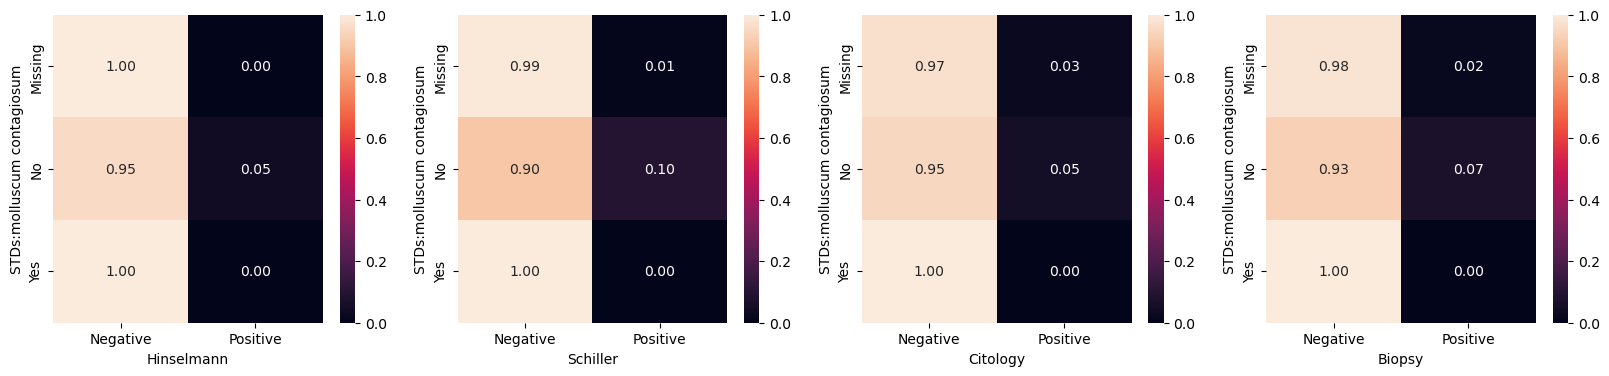

In [119]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['STDs:molluscum contagiosum'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'STDs:molluscum contagiosum', test, ax[index])

Again, only one woman said she has molluscum contagiosum, so these don't give us any more information than the other heatmaps do.

STDs:AIDS
0.0        753
Missing    102
Name: count, dtype: int64


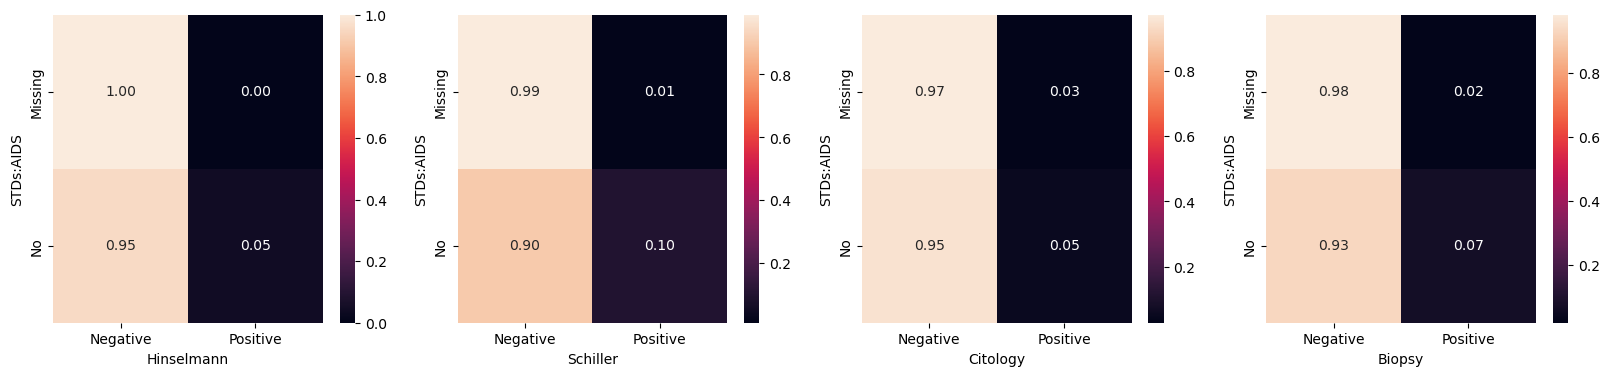

In [120]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['STDs:AIDS'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'STDs:AIDS', test, ax[index])

None of the women said they had AIDS.

STDs:HIV
0.0        735
Missing    102
1.0         18
Name: count, dtype: int64


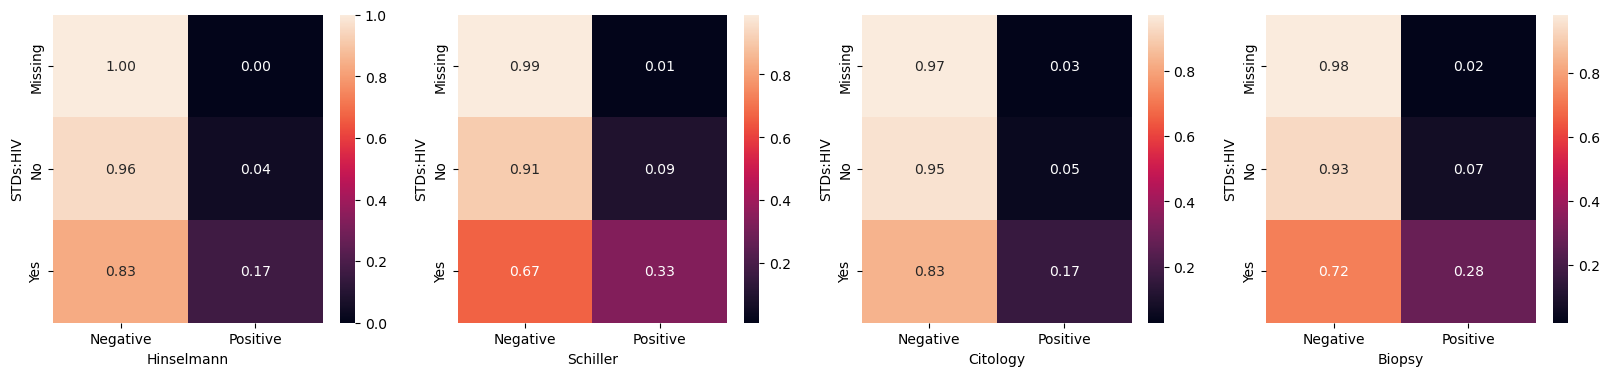

In [121]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['STDs:HIV'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'STDs:HIV', test, ax[index])

Only 18 women had HIV, but this group has the highest positive test rates we've seen thus far. The smallest difference in positive test rates was a 12% difference from the citology test and the highest was a 24% difference from the Schiller test. Even with the small sample of women who had HIV, this seems to be a significant factor.

STDs:Hepatitis B
0.0        752
Missing    102
1.0          1
Name: count, dtype: int64


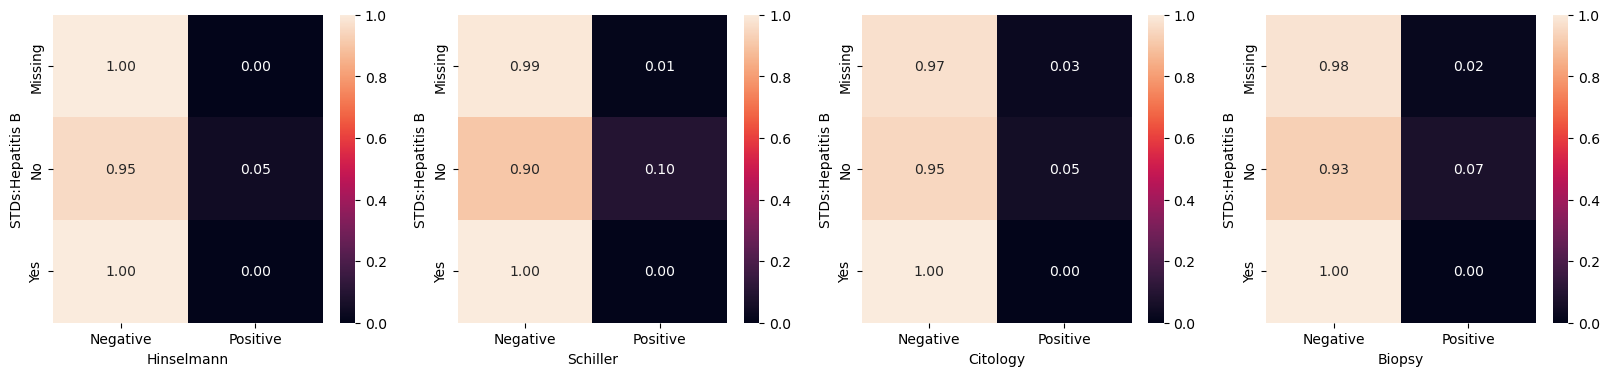

In [122]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['STDs:Hepatitis B'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'STDs:Hepatitis B', test, ax[index])

With hepatitis B we're returning to having a sample size of 1 for women who answered 'Yes', so there isn't much to gather from this group.

STDs:HPV
0.0        751
Missing    102
1.0          2
Name: count, dtype: int64


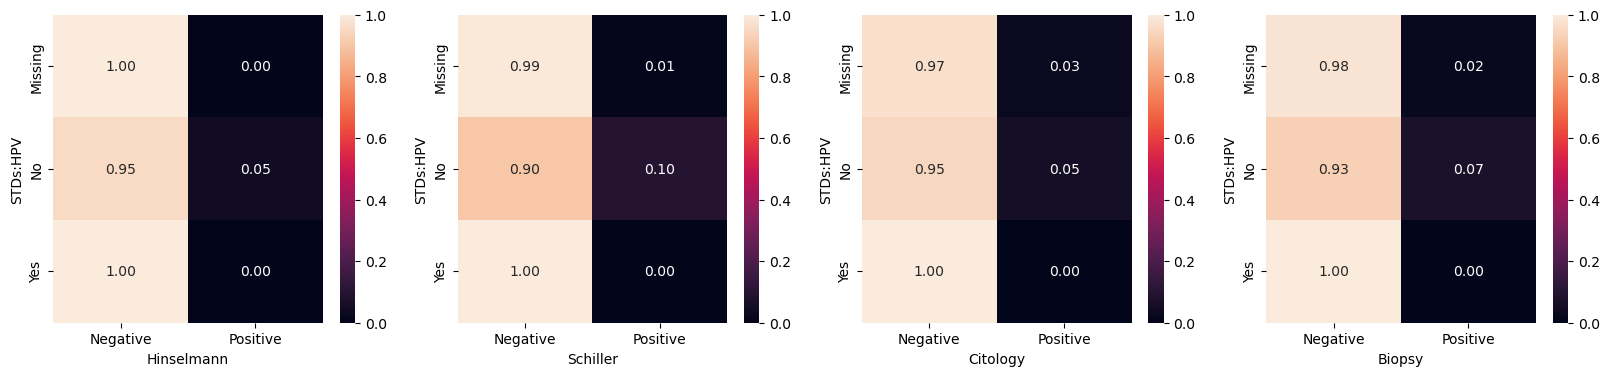

In [123]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['STDs:HPV'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'STDs:HPV', test, ax[index])

None of the women said they had HPV either, so there's not much to get from these charts.

Dx:Cancer
0    837
1     18
Name: count, dtype: int64


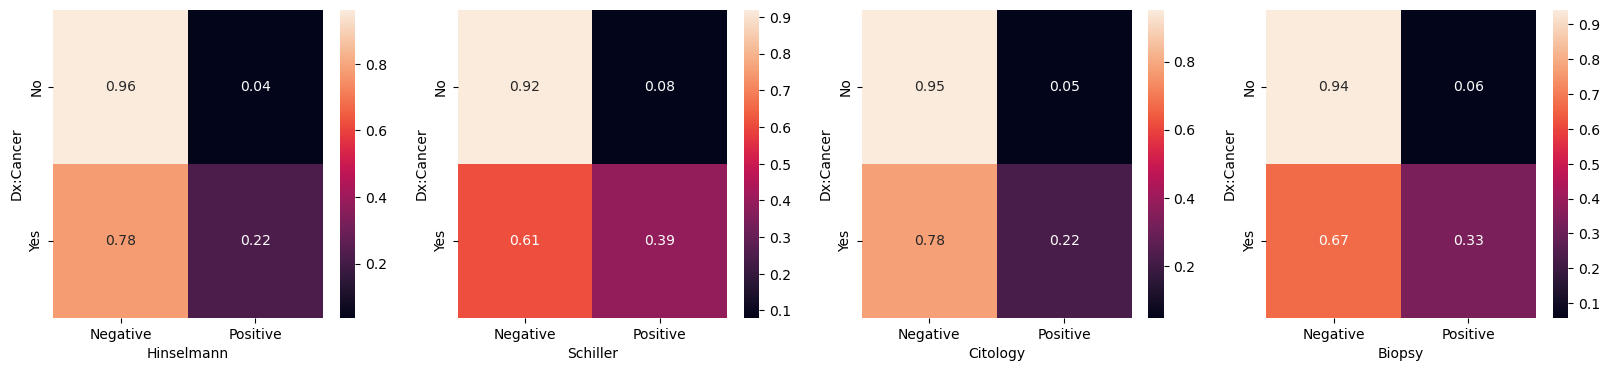

In [125]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['Dx:Cancer'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'Dx:Cancer', test, ax[index])

Women who were diagnosed with cancer have much higher positive test results than women who weren't diagnosed with cancer all across the board.

I'm not sure it makes much sense to try to predict test results given a diagnosis, but I will probably experiment with making a model including diagnoses and not including diagnoses.


Dx:CIN
0    846
1      9
Name: count, dtype: int64


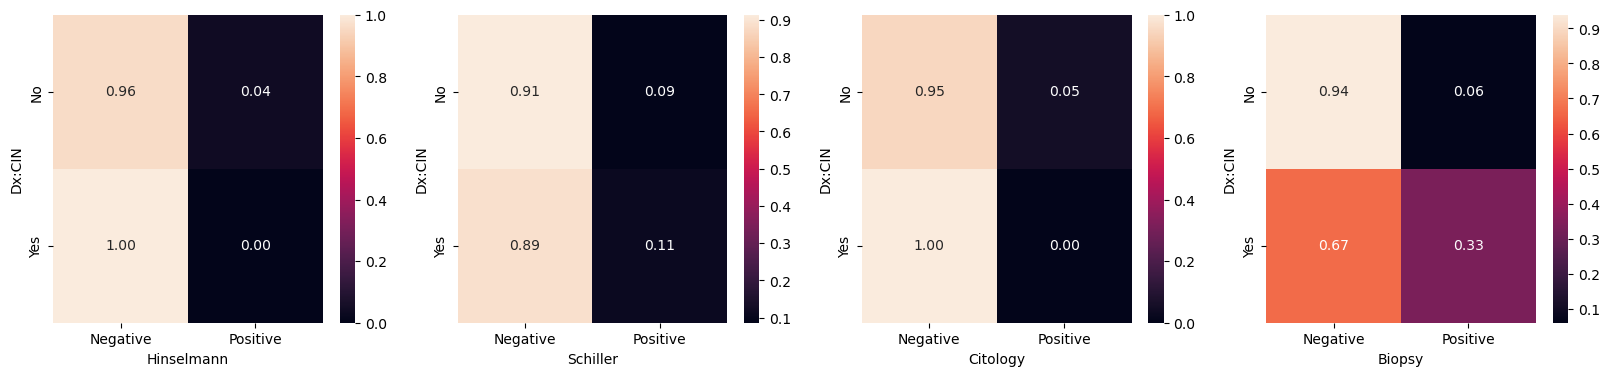

In [126]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['Dx:CIN'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'Dx:CIN', test, ax[index])

Only 9 women were diagnosed with CIN, but the biopsy tests were positive for 33% of the women with the diagnosis, up from the 6% positive in women without the diagnosis.

Dx:HPV
0    837
1     18
Name: count, dtype: int64


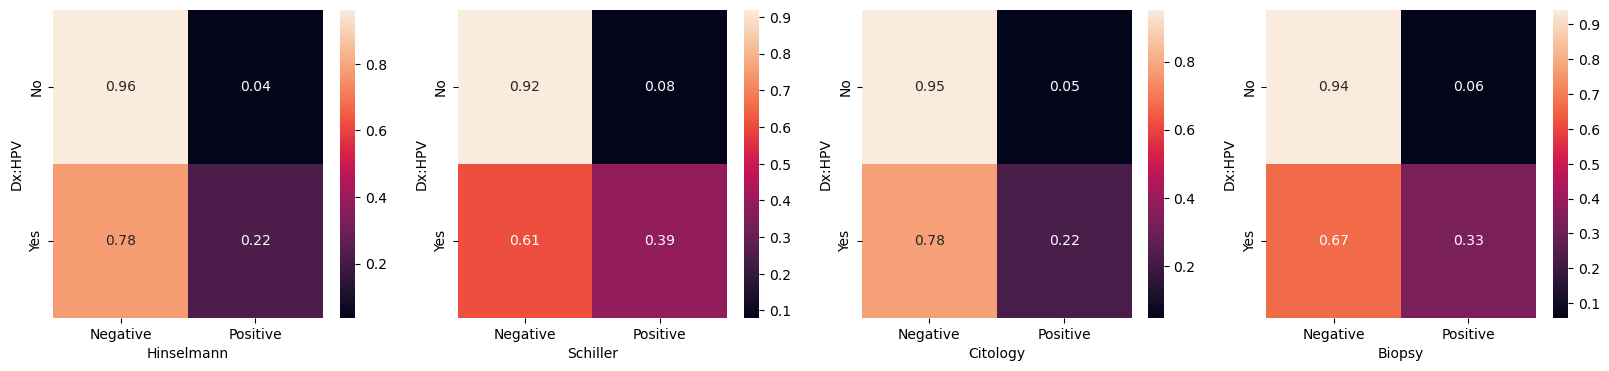

In [127]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['Dx:HPV'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'Dx:HPV', test, ax[index])

This column is nice to have because it serves as a good replacement for the column where women didn't answer and, as a diagnosis from the hospital rather than just an answer to a survey, there are no missing answers and we can be sure the women do actually have HPV.

The women with HPV had a substantially higher rate of positive tests than the women without it, but there weren't many women who had HPV in the first place. A whopping 837 received a negative diagnosis while 18 were positive.

Dx
0    831
1     24
Name: count, dtype: int64


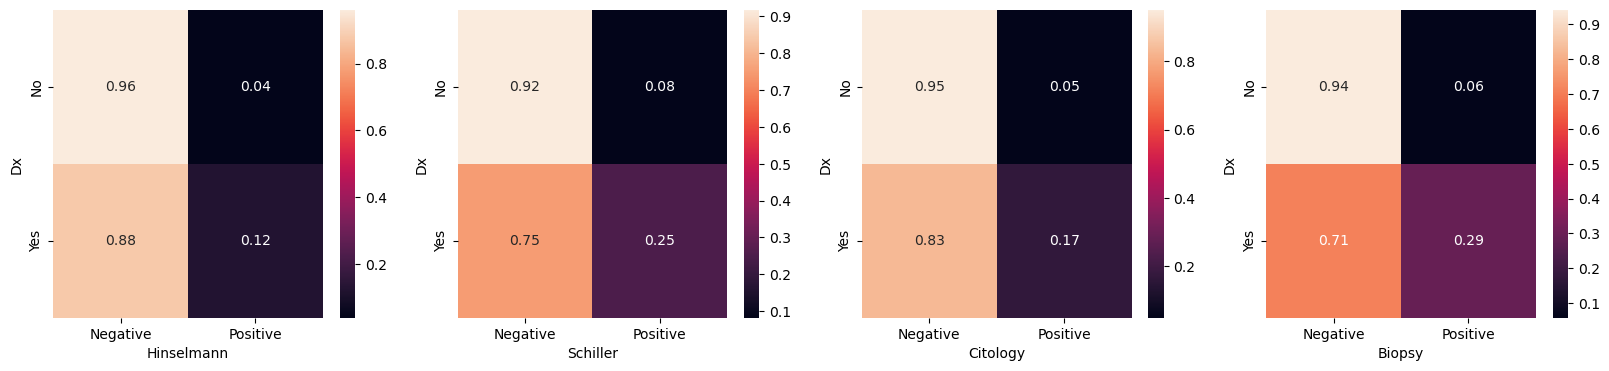

In [128]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

print(df['Dx'].fillna('Missing').value_counts())

for index, test in enumerate(test_types):
    plot_heatmap(df, 'Dx', test, ax[index])

The women who have a positive result in the 'Dx' column clearly have a higher rate of positive test results than the ones with a negative result.

After looking through the data documentation at the source and some other sites where the data is used, I'm not even sure what kind of diagnosis this is supposed to be. It does seem significant though, so I may see if it provides much help in the models. If the model was going to actually see use, it would probably be important to either find out what the diagnosis actually is or drop the column as it doesn't have much use to us if we don't know what it means.

The categorical columns that seem to have the greatest effect on the test results are:
* Smokes
* IUD
* STDs
* STDs:condylomatosis
* STDs:vulvo-perineal condylomatosis
* STDs:HIV
* Dx:Cancer
* Dx:CIN
* Dx:HPV
* Dx

If I can find a model that would utilize missing values well, the Hormonal contraceptives column may also be nice to have.